<a href="https://colab.research.google.com/github/veerendrarevu/FMML-LAB-ACTIVITY-1/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=bd704b3c509f449306252bcb086275f70de9d4eac4918726529d17e01aadfa64
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

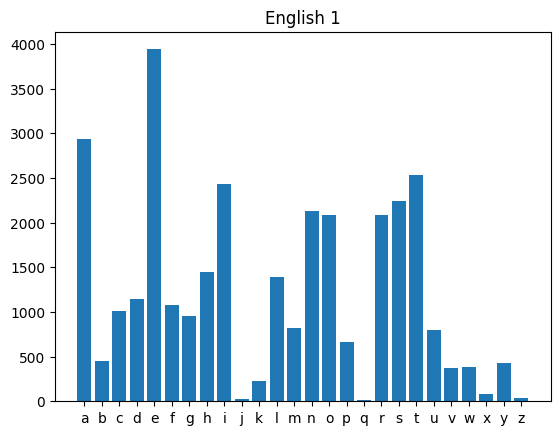

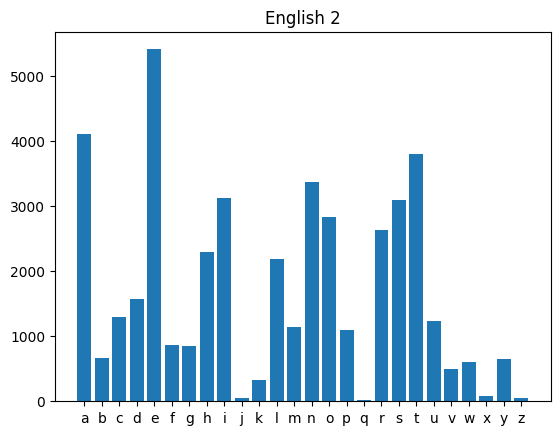

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

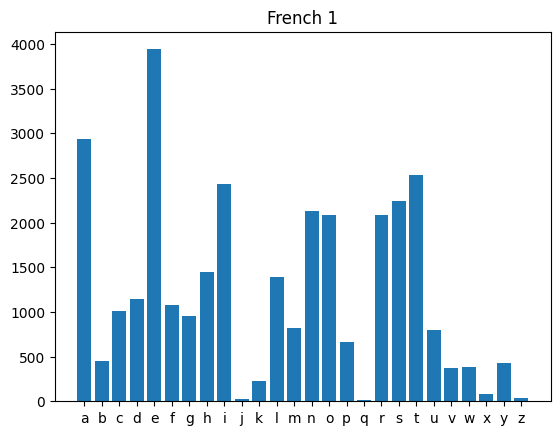

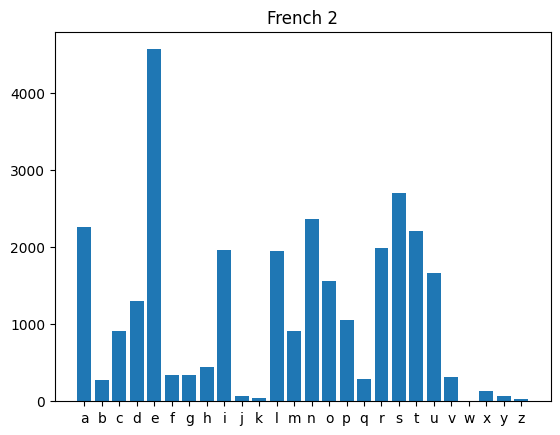

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

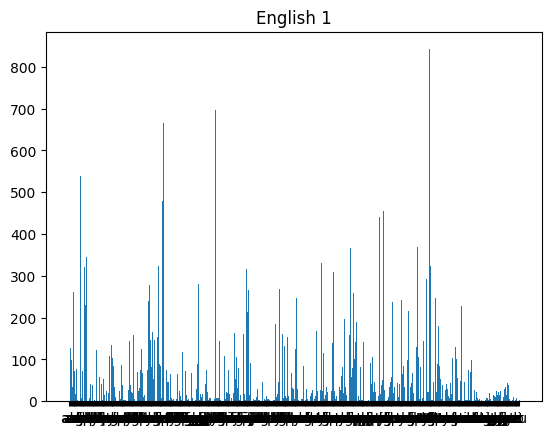

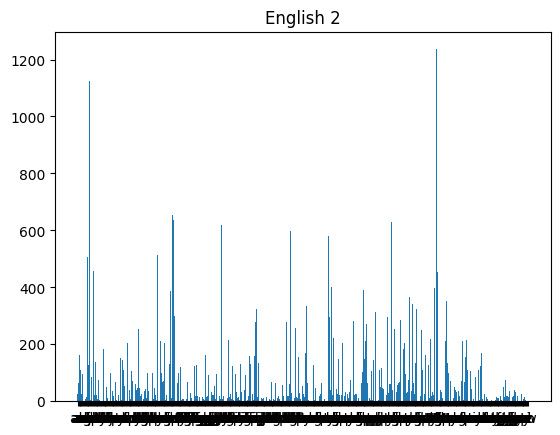

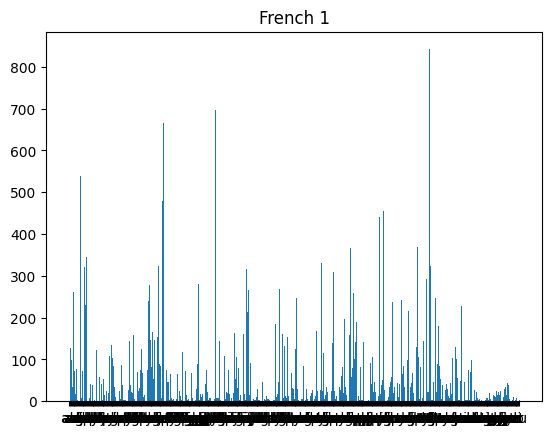

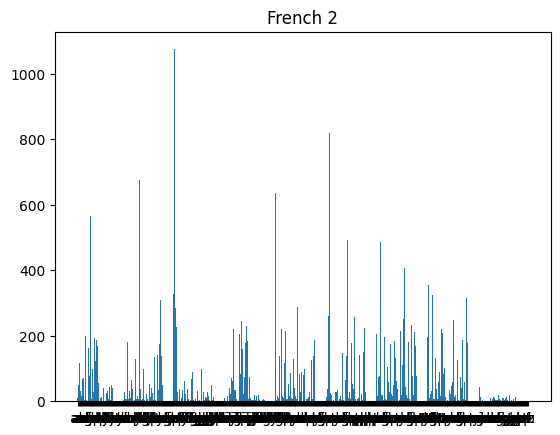

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

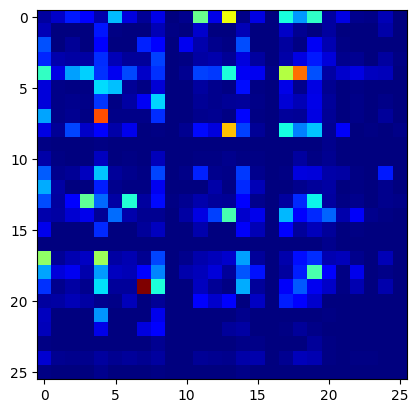

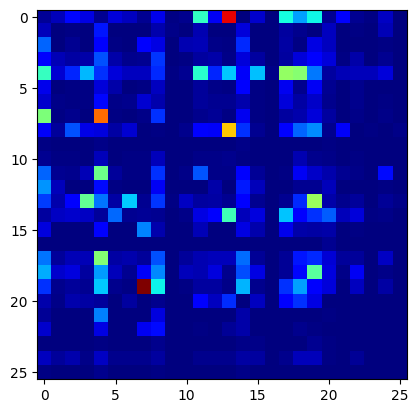

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

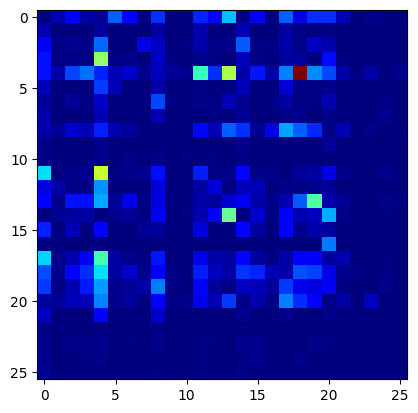

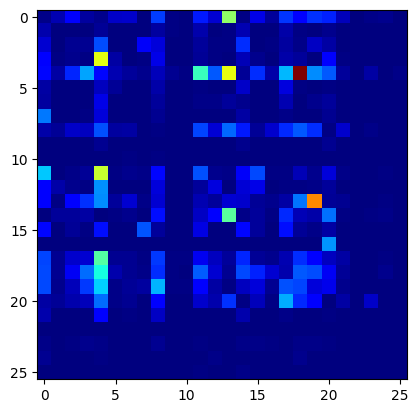

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1236.0
('a', 'n') : 1123.0
('h', 'e') : 981.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 653.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

***1)*** It appears you're discussing the use of bigram frequency as a feature for distinguishing languages and topics in text data. Bigrams, which are pairs of consecutive words or characters, can indeed be useful for language identification tasks because different languages often have distinct patterns of bigram frequencies. However, they may not be as effective for distinguishing topics within a language.

Here are some ways you can explore this concept further:

***Language Identification:***

>Collect text samples from various languages.
>Tokenize the text into bigrams.
>Calculate the frequency of each bigram in the text.
>Train a machine learning model (e.g., a classifier) on the bigram frequency
 data to distinguish between languages.
>Test the model on new text samples to identify the language they belong to.

***Topic Classification:***

>Collect text data related to different topics (e.g., sports, politics, science, entertainment).
>Tokenize the text into bigrams.
>Calculate the frequency of each bigram in the text.
>Train a machine learning model on the bigram frequency data to classify text
 into topics.
>Evaluate the model's performance in distinguishing between topics within a
 language.

***Multilingual Topic Classification:***

>Collect multilingual text data that covers various topics.
>Tokenize the text into bigrams.
>Calculate the frequency of each bigram in the text.
>Train a machine learning model to classify text into topics, considering both
 language and topic as target labels.
>This way, you can explore whether bigram frequencies can help distinguish
 topics while also considering language differences.

***Feature Engineering:***

>>Experiment with different types of n-grams, such as trigrams or character-level n-grams, and assess their effectiveness in distinguishing languages and topics.
>>Combine bigram frequency features with other text-based features, such as TF-IDF or word embeddings, to improve performance in distinguishing topics.

***Visualization:***

>Create visualizations of bigram frequency distributions for different          languages and topics.
>Tools like heatmaps, bar charts, or word clouds can provide insights into the
 patterns of bigram usage.
>Remember that the effectiveness of bigram frequencies as features for language
 and topic identification can vary depending on the quality and quantity of your training data and the specific machine learning algorithms you use. It's also important to preprocess and clean your text data to remove noise and irrelevant information before feature extraction.

***2)*** Using very different topics in your analysis can have several effects on the utility of bigram frequencies for distinguishing between them. Here's what you might expect when using different topics or text sources:

***Distinct Bigram Patterns:***
 When comparing topics that are significantly different, you're more likely to observe distinct bigram patterns. For example, the bigram frequencies for topics like "elephant" and "giraffe" are likely to overlap to some extent because they both relate to animals, but if you compare "elephant" to "space exploration," you would likely see more pronounced differences in bigram usage.

***Source-Specific Patterns:***
 The choice of data source can also influence bigram patterns. Wikipedia articles are generally well-structured and may exhibit certain writing conventions, which can impact bigram frequencies. If you use text from sources with different writing styles or genres (e.g., news articles, social media posts, scientific papers), you may encounter source-specific bigram patterns.

***Noise and Variability:***
 Using text from different sources may introduce more noise and variability in your bigram data. Noisy or inconsistent data can make it more challenging to identify clear patterns and relationships. Preprocessing and data cleaning become especially important in such cases.

***Feature Importance:***
 In machine learning tasks like topic classification or language identification, you might find that bigram frequencies become more or less important features depending on the topics or sources. Some topics may be better distinguished using other features or linguistic characteristics.

***Evaluation:***
 When evaluating the performance of models or methods that rely on bigram frequencies, it's important to consider the baseline. If the topics are very different, even basic methods might achieve relatively high accuracy in distinguishing them.

***Generalization:***
 Depending on the diversity of topics or sources you use, you may need to assess how well your models generalize to unseen data. A model that works well for distinguishing animals may not perform as well for distinguishing, say, historical events.



***Feature Engineering:***
 Experiment with different types of features beyond just bigram frequencies. For example, you could include unigrams, trigrams, TF-IDF values, word embeddings, or more advanced linguistic features.

***Cross-Validation:***
 Use cross-validation techniques to assess how well your models generalize across different topics or sources. This can help you understand the robustness of your approach.

***Data Preprocessing:***
Carefully preprocess and clean your data to remove noise and standardize text from different sources. This can improve the consistency of your features.

***Domain Knowledge:***
 Incorporate domain-specific knowledge into your analysis. Understanding the unique characteristics of the topics or sources you're working with can guide your feature selection and model choice.

Ultimately, the choice of topics and data sources should align with your research or analysis goals. Exploring a diverse range of topics and sources can provide valuable insights into the behavior of bigram features and their applicability to different text analysis tasks.

***3)*** Using and visualizing trigrams and higher n-grams (n > 3) is similar to working with bigrams (2-grams), but you'll be considering sequences of three or more words or characters instead. Here's how you can use and visualize trigrams and higher n-grams:

1.*** Tokenization:***
First, you'll need to tokenize your text into trigrams or higher n-grams. Tokenization is the process of splitting text into individual units, such as words or characters. When working with trigrams or higher n-grams, you'll be splitting the text into sequences of three or more consecutive tokens.

In [ ]:
import nltk
# Example sentence
sentence = "This is an example sentence for trigram visualization."
# Tokenize into trigrams
tokens ="the","fox"
trigrams = list(nltk.ngrams(tokens, 3))
print(trigrams)


[]


***2. Frequency Calculation:***
Calculate the frequency of each trigram or n-gram in your text data. This involves counting how often each n-gram appears in the text.

In [ ]:
from collections import Counter
# Calculate trigram frequencies
trigram_freq = Counter(trigrams)
print(trigram_freq)


Counter()


***3. Visualization:***
There are various ways to visualize trigrams and higher n-grams, depending on your goals and preferences. Here are some common visualization methods:

***a. Bar Chart or Histogram:***
Create a bar chart or histogram to visualize the frequency of the most common trigrams or n-grams. This can help you identify patterns and frequently occurring sequences.


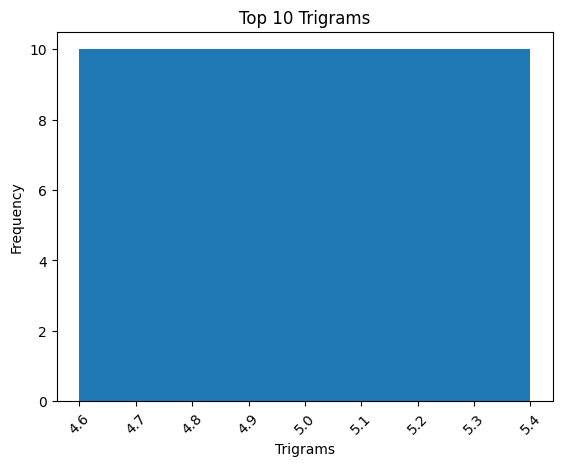

In [ ]:
import matplotlib.pyplot as plt
# Plot the most common trigrams
common_trigrams = trigram_freq.most_common(10)  # Adjust the number as needed
labels,counts=(5,10)
plt.bar(labels,counts)
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams')
plt.xticks(rotation=45)
plt.show()


*** Word Cloud:***
Generate a word cloud to visually represent the most common trigrams or n-grams. Word clouds can provide a quick overview of the most prominent sequences.

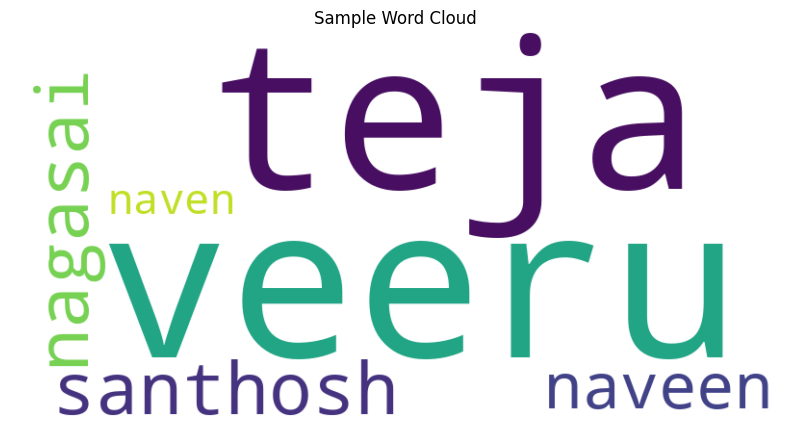

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text=""" veeru naveen  teja santhosh nagasai veeru naveen  teja santhosh nagasai veeru naveen  teja santhosh nagasai veeru naven  teja santhosh nagasai """

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Sample Word Cloud')
plt.show()


***c. Network Graph:***
For higher n-grams, you can create a network graph to visualize relationships between tokens in the sequences. Each token is a node, and connections represent the sequence of tokens.

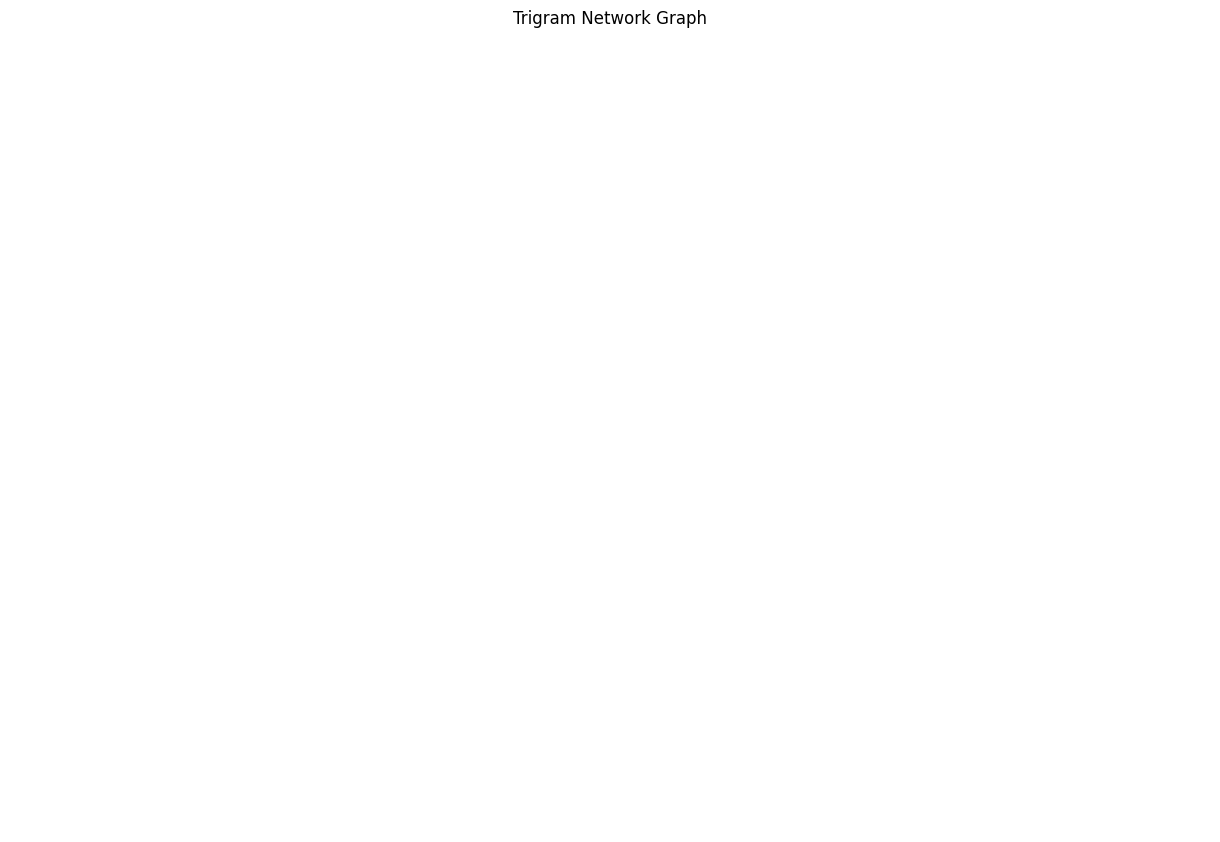

In [ ]:
import networkx as nx
# Create a graph for trigrams
G = nx.Graph()
# Add trigram nodes and edges
for trigram, freq in trigram_freq.items():
    G.add_node(' '.join(trigram), size=freq)
# Draw the graph
pos = nx.spring_layout(G, seed=42)
sizes = [freq * 10 for freq in nx.get_node_attributes(G, 'size').values()]
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=sizes, font_size=10)
plt.title('Trigram Network Graph')
plt.show()


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

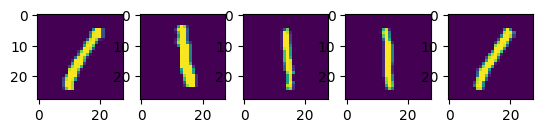

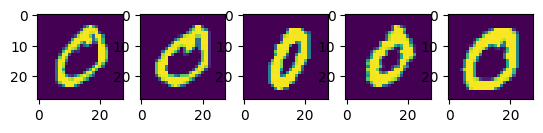

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

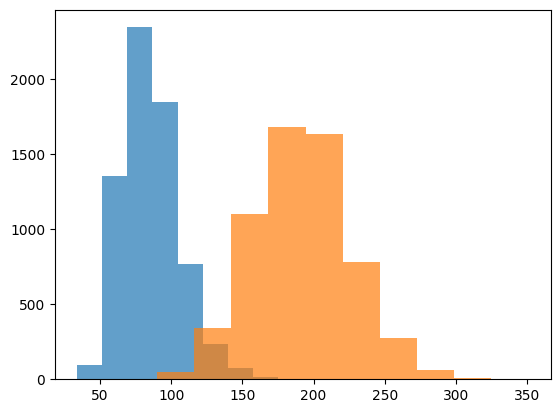

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

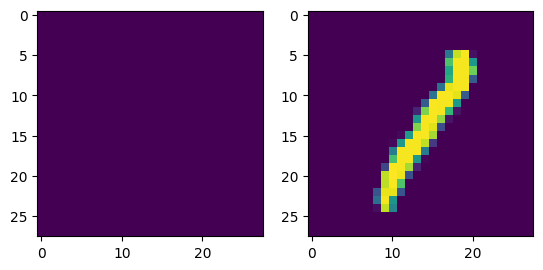

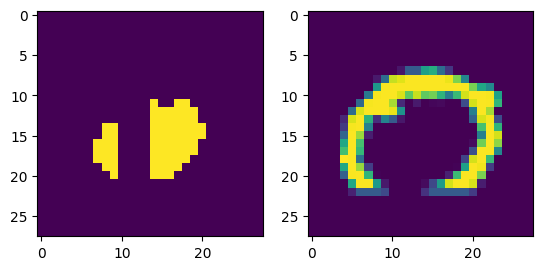

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

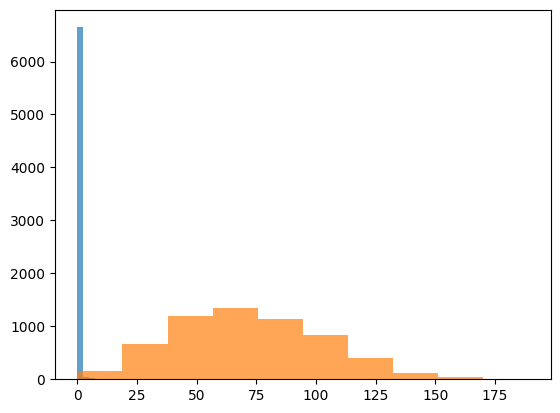

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

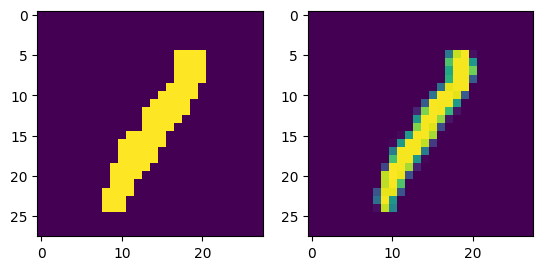

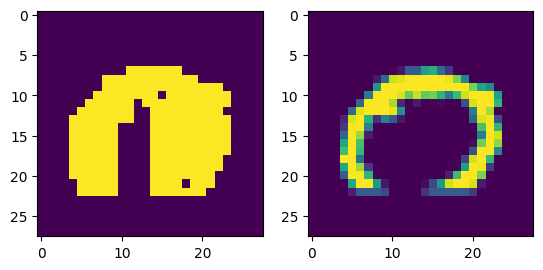

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

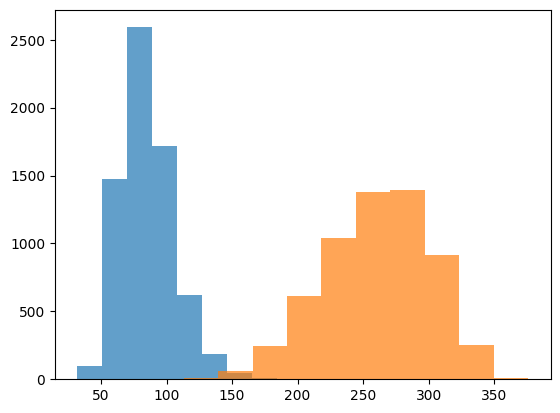

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

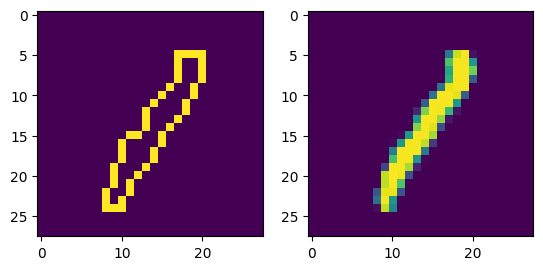

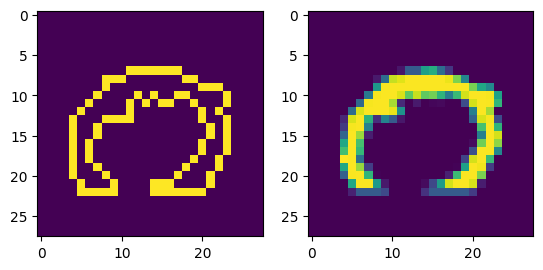

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

***1)*** Determining the best combination of features from a 28x28 dimensional image depends on the specific task or problem you're trying to solve. There is no one-size-fits-all answer to this question, as the choice of features should be driven by the requirements of your machine learning or data analysis task.

To select the best combination of features, you can follow these steps:

**Define your objective:** Clearly specify the problem you're trying to solve. Are you trying to classify images, perform regression, or some other task? The choice of features should align with your objective.

**Feature Selection Methods:**
 There are various feature selection methods you can use to evaluate and select the best combination of features. Some common methods include:

**Univariate Feature Selection:**
 This involves selecting the best individual features based on statistical tests such as chi-squared, ANOVA, or mutual information.

**Recursive Feature Elimination (RFE):**
 RFE recursively removes the least important features based on a selected machine learning algorithm's feature importance scores.

**Principal Component Analysis (PCA):**
 PCA can be used for dimensionality reduction, where you transform the original features into a smaller set of uncorrelated features (principal components).

**Feature Importance from Tree-based Models:**
If your task involves classification or regression, you can use tree-based models (e.g., Random Forest, Gradient Boosting) to assess feature importance.

 **Correlation Analysis:**
  Analyze the correlation between features and the target variable to identify important features.

**Visualization:**
 Once you have identified a subset of features using one or more of the above methods, you can create graphs or visualizations to assess their impact on your task. For example, you can plot scatter plots, histograms, or bar charts to visualize the relationship between individual features and your target variable.

**Model Evaluation:**
 After selecting a feature combination, you should train machine learning models using these features and evaluate their performance using appropriate metrics (e.g., accuracy, F1-score, mean squared error). You can use techniques like cross-validation to ensure robustness of your results.

**Iterate:**
 It may be necessary to iterate through these steps, trying different feature combinations and evaluating their impact on your specific problem.

There is no universal "best" combination of features since it depends on your data and task. The best combination is the one that leads to the highest performance on your chosen evaluation metric. Visualization can help you gain insights into the relationships between features and your target variable, but the final decision should be based on quantitative evaluation using machine learning models.







***2)*** Testing and visualizing datasets with four or more features (also known as multivariate data) can be challenging because it's not as straightforward as visualizing two or three features on a traditional scatterplot or 3D plot. Here are some methods you can use to test and visualize such data:

**Pairwise Scatterplots or Correlation Matrix:**
Create scatterplots of all possible pairs of features. If you have N features, you'll have N(N-1)/2 scatterplots.
Alternatively, create a correlation matrix to visualize the relationships between pairs of features. Use color coding or heatmap representations to indicate the strength and direction of correlations (positive or negative).

**Parallel Coordinates Plot:**
A parallel coordinates plot is a way to visualize multivariate data by representing each data point as a line, with each feature represented by a vertical axis. Connections between lines can highlight similarities or differences between data points.

**3D Scatterplots with Color Mapping:**
If you have exactly four features, you can create a 3D scatterplot where three features define the three axes, and the fourth feature can be represented using color or size of the data points.

**Ternary Plot (for Three Continuous Features):**
Ternary plots are useful for visualizing data with three continuous features. They use a triangular grid where each corner represents one feature, and data points are plotted inside the triangle based on the relative values of the features.

**Dimensionality Reduction Techniques:**
Techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) can reduce the dimensionality of your data to 2D or 3D, making it easier to visualize relationships between multiple features. Plot the reduced dimensions.

**Parallel Sets (for Categorical Data):**
Parallel sets, also known as parallel set plots or Sankey diagrams, are useful for visualizing relationships between categorical variables in multivariate data.

**3D Surface Plots (for Four Continuous Features):**
If you have exactly four continuous features, you can create 3D surface plots to visualize relationships between them. These plots can show how a response variable changes in response to changes in the four input features.

**Radviz Plot:**
Radviz is a technique that maps multivariate data points onto a 2D plane by positioning them along radial axes. Each axis corresponds to a feature, and the data points are placed based on their feature values.

**Density Plots:**
Create 2D density plots or contour plots to visualize the distribution of data points with respect to pairs of features. These can reveal concentration areas and patterns.

**Interactive Visualization Tools:**
Utilize interactive visualization libraries like Plotly, Bokeh, or D3.js to create interactive plots that allow you to explore relationships between multiple features dynamically.

Remember that the choice of visualization method depends on the nature of your data, your research goals, and the number and types of features you have. It's often useful to combine multiple visualization techniques to gain a comprehensive understanding of multivariate data.

***3)*** Certainly! Creating new features, often called feature engineering, is a crucial step in data analysis and machine learning. The goal is to derive meaningful information from existing data or generate new variables that can improve the performance of a model or provide deeper insights into the dataset. Here are some examples of how you can come up with your own features:

Binning or Discretization:
Convert continuous variables into categorical ones by creating bins or ranges. For example, you can convert age into age groups (e.g., "young," "middle-aged," "senior").

Interaction Features:
Combine two or more existing features to create interaction terms. For instance, if you have features for "distance" and "time," you can create a new feature "speed" by dividing distance by time.

Polynomial Features:
Generate higher-order features by squaring, cubing, or taking other mathematical transformations of existing features. This can capture non-linear relationships.

Date and Time Features:
Extract meaningful information from date and time variables, such as day of the week, month, quarter, or year. You can also calculate time durations or time since a specific event.

Text Features:
When working with text data, create features like word counts, character counts, or sentiment scores. You can also use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) to represent text data.

Geospatial Features:
For geographical data, derive features like distances between locations, area calculations, or density metrics based on geographic coordinates.

Aggregated Features:
Calculate statistics like mean, median, minimum, maximum, or standard deviation for groups or subsets of your data. For example, calculate the average income for each city in a dataset.

Ratio Features:
Create ratios or proportions between two features. For example, the debt-to-income ratio can be derived from debt and income features.

Boolean Features:
Generate binary features based on specific conditions. For instance, create a binary variable indicating whether a customer has made a purchase in the last 30 days.

Frequency Count Features:
Count the occurrences of specific events or values within a dataset. This can be useful for categorical variables, tags, or keywords.

Domain-Specific Features:
Depending on the domain or problem you're working on, you may have domain-specific knowledge that suggests useful features. For example, in healthcare, you might calculate a patient's BMI from height and weight.

Temporal Features:
For time-series data, create features like moving averages, lag values, or seasonal indicators to capture temporal patterns.

Derived Features from External Data:
Incorporate external data sources to create new features. For instance, add weather data to a sales dataset to study the impact of weather on sales.

***4)***  The features I mentioned in my previous response can be used to create new features for different classes beyond just binary classification (0 and 1). These feature engineering techniques are not limited to binary classification tasks; they are applicable to a wide range of classification and regression problems with multiple classes or continuous target variables. Here's how they can be adapted for different types of classification:

Multiclass Classification:
When dealing with more than two classes (e.g., three or more classes), you can still use the same feature engineering techniques. The target variable may have multiple classes (e.g., "class A," "class B," "class C"), and you can engineer features to improve the performance of a multiclass classification model.

Regression:
These features can also be used in regression tasks, where the target variable is continuous rather than categorical. For example, you can engineer features to predict the price of a house based on various features such as the number of bedrooms, square footage, location, etc.

Ordinal Classification:
In ordinal classification, where the classes have an inherent order or ranking, you can create features that capture the ordinal relationships between classes. These features can help a model understand the ordinal nature of the target variable.

Imbalanced Classes:
Feature engineering is also important when dealing with imbalanced datasets. You can engineer features that help the model better handle class imbalances and improve the predictive performance for minority classes.

Customized Features:
Depending on the specifics of your classification problem, you may need to engineer features that are tailored to the characteristics of the classes involved. For instance, if you're classifying types of diseases, features related to symptoms, risk factors, or medical history can be crucial.

***5)*** When you have more than two classes in a classification problem, it is referred to as a multiclass classification problem. In a multiclass classification scenario, the goal is to assign one of several possible class labels to each data instance, rather than just distinguishing between two classes as in binary classification. Here's what happens when you work with more than two classes:

Multiple Class Labels: Each data point can belong to one of several classes. For example, in a multiclass problem, you might be classifying images into various categories such as cats, dogs, and birds, where each class corresponds to a distinct label.

Classifier Outputs: The model you use for multiclass classification will typically produce multiple outputs, one for each class. These outputs could be in the form of probabilities (e.g., softmax output), where each class gets a probability score. The class with the highest probability is often chosen as the predicted class label for that data point.

Loss Function: The loss function used in training a multiclass classification model is often adapted to handle multiple classes. Common loss functions for multiclass problems include cross-entropy loss and categorical cross-entropy loss.

Evaluation Metrics: The evaluation metrics for assessing the performance of a multiclass classification model are different from those used in binary classification. Common metrics include accuracy, precision, recall, F1-score, and confusion matrices, which provide insights into how well the model is performing across all classes.

One-Hot Encoding: To represent the target variable in a multiclass problem, one-hot encoding is often used. Each class label is represented as a binary vector with one element set to 1 and the rest set to 0, indicating the true class for each data point.

Multiclass Algorithms: There are various algorithms and techniques designed specifically for multiclass classification. Some examples include logistic regression, support vector machines (SVM), decision trees, random forests, and deep learning architectures like convolutional neural networks (CNNs) and recurrent neural networks (RNNs).

Handling Imbalanced Data: Like binary classification, multiclass classification can also encounter imbalanced datasets, where some classes have significantly fewer examples than others. Techniques like oversampling, undersampling, or using class-weighted loss functions can be employed to address this issue.